# Transformación de Variables para conseguir una relación No Lineal

**Hay veces que la variable de salida no tiene una relación lineal con alguna de las variables de entrada, podría tener por ejemplo una relación algorítmica o exponencial, en este ....**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('../datasets/auto/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Vamos a comprobar con un plot el tipo de relación que tiene el horsepower con la variable mpg (millas por galeón)

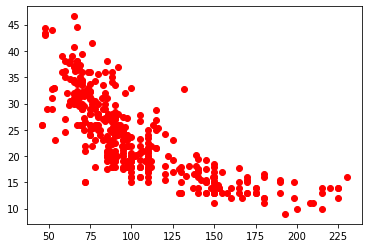

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

data.dropna(inplace=True)
plt.plot(data['horsepower'], data['mpg'], 'ro')
plt.show()

### A simple vista parece que las variables siguen una relación exponencial, o cuadrática (parábola), lo que vamos a hacer es ignorar esto primero y asumir que la relación es lineal, para luego cambiarla a exponencial y ver el impacto de esto en el modelo

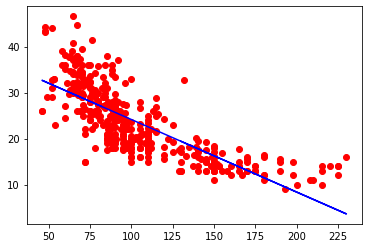

El R2 es de 0.6059482578894348


In [4]:
X = data['horsepower'].fillna(data['horsepower'].mean())
X = X.values.reshape(-1,1) # La regresión lineal de sklearn asume que la X viene en formato de dataframe
Y = data['mpg'].fillna(data['mpg'].mean())

lm = LinearRegression().fit(X, Y)
plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X), color='blue')
plt.show()
print(f'El R2 es de {lm.score(X, Y)}')

### El modelo anterior supone una relación lineal entre el horsepower y el mpg del dataset
### Vamos a probar ahora suponiendo una relación cuadrática, es decir, la ecuación del modelo será:
* mpg = w***horsepower^2** + b

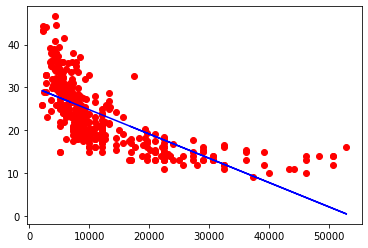

El R2 es de 0.5073670089832611


In [5]:
squared_X = X**2

cuadratic_model = LinearRegression().fit(squared_X, Y)
plt.plot(squared_X, Y, 'ro')
plt.plot(squared_X, cuadratic_model.predict(squared_X), color='blue')
plt.show()
print(f'El R2 es de {cuadratic_model.score(squared_X, Y)}')

### Se observa que incluso pierde efectividad el modelo, lo que vamos a hacer ahora es convertir la variable predictora en un polinomio de grado 2, esto se hace con la clase PolynimialFeatures como vemos abajo...

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

print(x_poly)

[[1.0000e+00 1.3000e+02 1.6900e+04]
 [1.0000e+00 1.6500e+02 2.7225e+04]
 [1.0000e+00 1.5000e+02 2.2500e+04]
 ...
 [1.0000e+00 8.4000e+01 7.0560e+03]
 [1.0000e+00 7.9000e+01 6.2410e+03]
 [1.0000e+00 8.2000e+01 6.7240e+03]]


### La función fit_transform de la clase PolynomialFeatures, hace la siguiente transformación para degree = 2:
* **[a] -> [a^0, a^1, a^2]**

### Y si le pasamos un set multivariable:
* **[a, b] -> [1, a, b, a^2, a*b, b^2]**

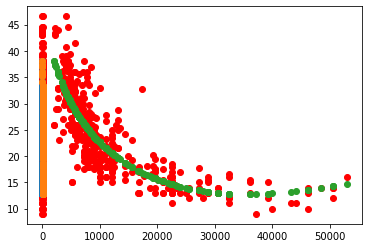

El R2 es de 0.6875590305127516


In [16]:
model = LinearRegression().fit(x_poly, Y)
plt.plot(x_poly, Y, 'ro')
plt.plot(x_poly, model.predict(x_poly), 'o')
plt.show()
print(f'El R2 es de {model.score(x_poly, Y)}')

### Ahora si que nuestro modelo adopta la forma de una función cuadrática y conseguimos una mejora notable en el R2